## Inprocessing - Adversial Debiasing  -  Compas Model
- for 'sex' and 'race'

In [4]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.insert(0, project_root)

import tensorflow.compat.v1 as tf
from tensorflow.compat.v1 import reset_default_graph
import pandas as pd
from src.data_loading import load_adult_sex, load_adult_race
from src.modeling import adversial_debiasing_train_and_predict
from src.metrics import compute_metrics, compare_viz_metrics_2x3
from aif360.algorithms.inprocessing import AdversarialDebiasing
from aif360.datasets import BinaryLabelDataset
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd

In [5]:
baseline_race_agg = pd.read_csv('../../reports/baseline_agg/adult_race_metrics_agg.csv', index_col=0)
baseline_sex_agg = pd.read_csv('../../reports/baseline_agg/adult_sex_metrics_agg.csv', index_col=0)

--------------------------------------------------------------------------------------------------------------------------------------

## default adversial debiaser, race

In [6]:
# 1) Retrieve data
protected           = 'race'
privileged_value    = 1.0
unprivileged_value  = 0.0
privileged_groups   = [{protected: privileged_value}]
unprivileged_groups = [{protected: unprivileged_value}]

tf.disable_v2_behavior()
ds, df = load_adult_race()  
feature_cols = [c for c in df.columns if c not in ('label','race')]

# 2) Run experiment, Evaluate
sss = StratifiedShuffleSplit(n_splits=25, test_size=0.2, random_state=42)

results = []
for i, (train_idx, test_idx) in enumerate(sss.split(df, df['label'])):
    test_df, y_test, y_pred = adversial_debiasing_train_and_predict(
    df,
    train_idx,
    test_idx,
    protected,
    privileged_value,
    unprivileged_value,
    privileged_groups,
    unprivileged_groups,
    scope_name='adv',           
    num_epochs=50,
    batch_size=128,
    adversary_loss_weight=0.1)
    
    m = compute_metrics(
        test_df, y_test, y_pred,
        protected, privileged_value, unprivileged_value
    )
    results.append(m)

# 3) Aggregate
adult_race_metrics = pd.DataFrame(results)
adult_race_metrics_agg = adult_race_metrics.agg(['mean','std'])
print(adult_race_metrics_agg)

epoch 0; iter: 0; batch classifier loss: 33.336464; batch adversarial loss: 0.698576
epoch 0; iter: 200; batch classifier loss: 5.936798; batch adversarial loss: 0.652281
epoch 1; iter: 0; batch classifier loss: 5.579461; batch adversarial loss: 0.601110
epoch 1; iter: 200; batch classifier loss: 2.696638; batch adversarial loss: 0.553113
epoch 2; iter: 0; batch classifier loss: 8.840158; batch adversarial loss: 0.536361
epoch 2; iter: 200; batch classifier loss: 3.363139; batch adversarial loss: 0.498092
epoch 3; iter: 0; batch classifier loss: 4.014528; batch adversarial loss: 0.455007
epoch 3; iter: 200; batch classifier loss: 1.884238; batch adversarial loss: 0.470924
epoch 4; iter: 0; batch classifier loss: 0.388041; batch adversarial loss: 0.448188
epoch 4; iter: 200; batch classifier loss: 1.080223; batch adversarial loss: 0.399339
epoch 5; iter: 0; batch classifier loss: 4.836834; batch adversarial loss: 0.460488
epoch 5; iter: 200; batch classifier loss: 1.055685; batch advers

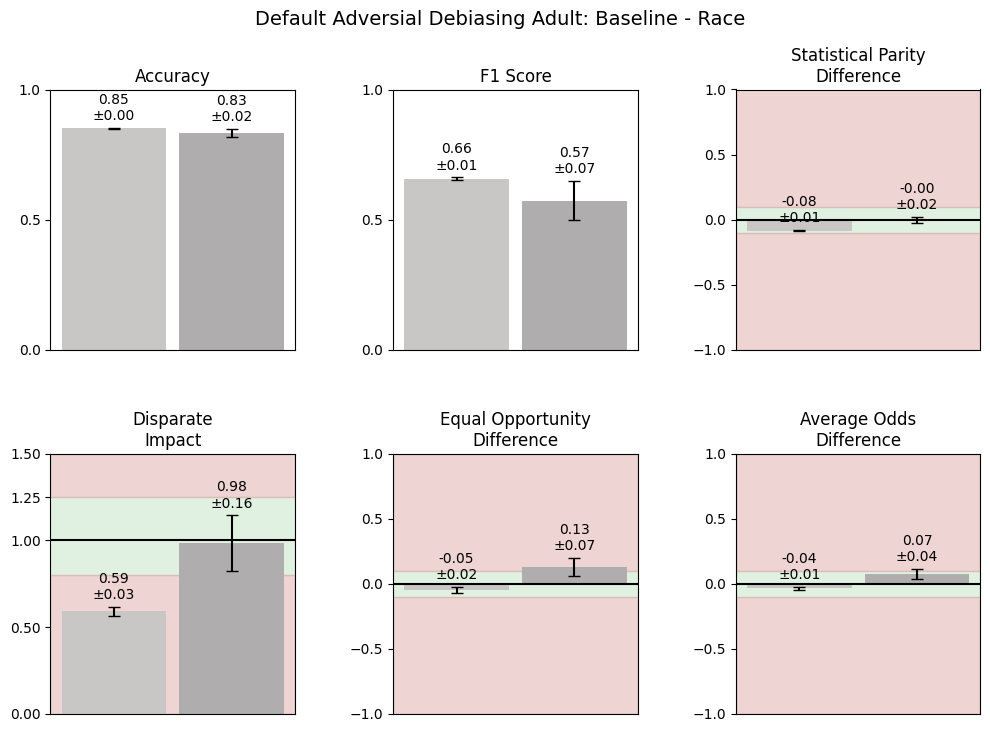

In [7]:
compare_viz_metrics_2x3(baseline_race_agg, adult_race_metrics_agg, 'Baseline', 'Race', 'Default Adversial Debiasing Adult: Baseline - Race')

## default adversial debiaser, sex

In [8]:
# 1) Retrieve data
protected           = 'sex'
privileged_value    = 1.0
unprivileged_value  = 0.0
privileged_groups   = [{protected: privileged_value}]
unprivileged_groups = [{protected: unprivileged_value}]

tf.disable_v2_behavior()
ds, df = load_adult_sex()  
feature_cols = [c for c in df.columns if c not in ('label','sex')]

# 2) Run experiment, Evaluate
sss = StratifiedShuffleSplit(n_splits=25, test_size=0.2, random_state=42)

results = []
for i, (train_idx, test_idx) in enumerate(sss.split(df, df['label'])):
    test_df, y_test, y_pred = adversial_debiasing_train_and_predict(
    df,
    train_idx,
    test_idx,
    protected,
    privileged_value,
    unprivileged_value,
    privileged_groups,
    unprivileged_groups,
    scope_name='adv',           
    num_epochs=50,
    batch_size=128,
    adversary_loss_weight=0.1)
    
    m = compute_metrics(
        test_df, y_test, y_pred,
        protected, privileged_value, unprivileged_value
    )
    results.append(m)

# 3) Aggregate
adult_sex_metrics = pd.DataFrame(results)
adult_sex_metrics_agg = adult_sex_metrics.agg(['mean','std'])
print(adult_race_metrics_agg)

epoch 0; iter: 0; batch classifier loss: 4.419303; batch adversarial loss: 0.659783
epoch 0; iter: 200; batch classifier loss: 19.950031; batch adversarial loss: 0.619075
epoch 1; iter: 0; batch classifier loss: 8.170157; batch adversarial loss: 0.565668
epoch 1; iter: 200; batch classifier loss: 3.687250; batch adversarial loss: 0.663067
epoch 2; iter: 0; batch classifier loss: 5.828294; batch adversarial loss: 0.609867
epoch 2; iter: 200; batch classifier loss: 3.980613; batch adversarial loss: 0.669920
epoch 3; iter: 0; batch classifier loss: 4.614372; batch adversarial loss: 0.641021
epoch 3; iter: 200; batch classifier loss: 1.879217; batch adversarial loss: 0.625236
epoch 4; iter: 0; batch classifier loss: 2.555663; batch adversarial loss: 0.638144
epoch 4; iter: 200; batch classifier loss: 1.196094; batch adversarial loss: 0.597470
epoch 5; iter: 0; batch classifier loss: 0.649637; batch adversarial loss: 0.610009
epoch 5; iter: 200; batch classifier loss: 0.503398; batch advers

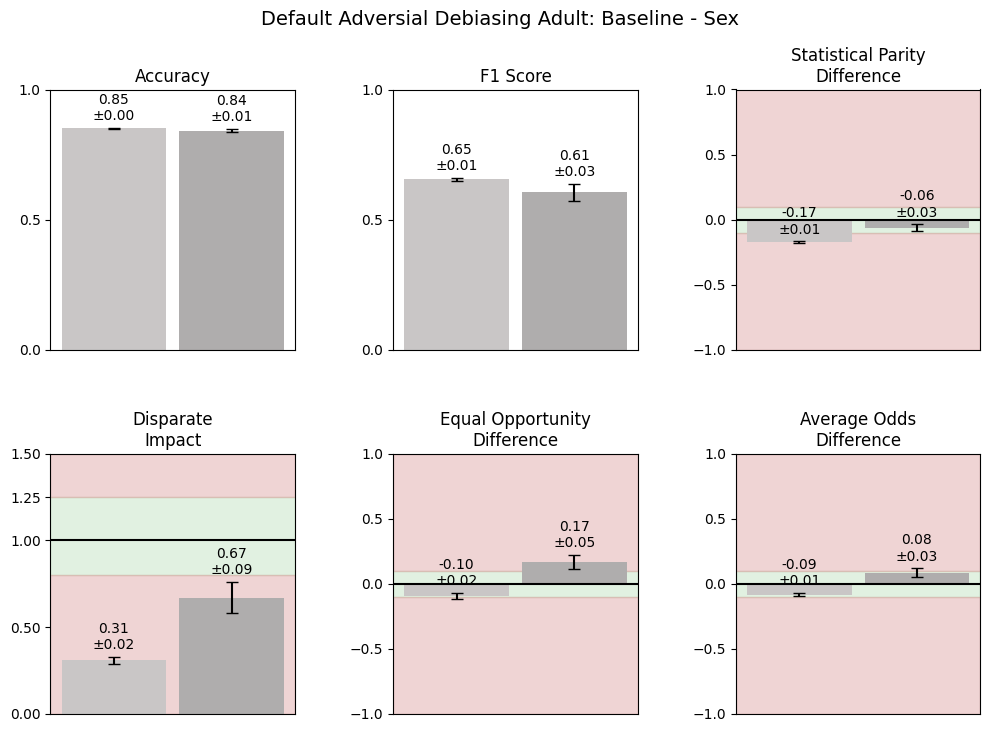

In [9]:
compare_viz_metrics_2x3(baseline_sex_agg, adult_sex_metrics_agg, 'Baseline', 'Sex', 'Default Adversial Debiasing Adult: Baseline - Sex')

## hyperparameter search adversial debiaser, race

In [10]:
import pandas as pd
from sklearn.model_selection import ParameterGrid, StratifiedShuffleSplit, StratifiedKFold
from src.metrics import best_hyperparameter_advdeb

# 1) Retrieve data
protected           = 'race'
privileged_value    = 1.0
unprivileged_value  = 0.0
privileged_groups   = [{protected: privileged_value}]
unprivileged_groups = [{protected: unprivileged_value}]

tf.disable_v2_behavior()
ds, df = load_adult_race()  
feature_cols = [c for c in df.columns if c not in ('label','race')]

# 2) Hyperparameter Search
param_grid = {
    'adversary_loss_weight': [0.5, 1.0],
    'num_epochs':            [10, 20, 50],
    'batch_size':            [64, 128]
}
grid = list(ParameterGrid(param_grid))

grid_results = []
# Perform hyperparameter search with 15 stratified shuffle splits
for params in grid:
    print(f"Testing config: {params}")
    fold_metrics = []
    sss = StratifiedShuffleSplit(n_splits=15, test_size=0.2, random_state=42)

    for train_idx, test_idx in sss.split(df, df['label']):
        test_df, y_test, y_pred = adversial_debiasing_train_and_predict(
            df, train_idx, test_idx,
            protected, privileged_value, unprivileged_value,
            privileged_groups, unprivileged_groups,
            scope_name='adv',
            num_epochs=params['num_epochs'],
            batch_size=params['batch_size'],
            adversary_loss_weight=params['adversary_loss_weight']
        )
        m = compute_metrics(
            test_df, y_test, y_pred,
            protected, privileged_value, unprivileged_value
        )
        fold_metrics.append(m)
    
    df_fm = pd.DataFrame(fold_metrics)
    agg = df_fm.agg(['mean', 'std'])
    
    grid_results.append({
        **params,
        'acc_mean':   agg.loc['mean', 'accuracy'],
        'acc_std':    agg.loc['std',  'accuracy'],
        'f1_mean':    agg.loc['mean', 'f1_score'],
        'f1_std':     agg.loc['std',  'f1_score'],
        'SPD_mean':   agg.loc['mean', 'SPD'],
        'SPD_std':    agg.loc['std',  'SPD'],
        'DI_mean':    agg.loc['mean', 'DI'],
        'DI_std':     agg.loc['std',  'DI'],
        'EOD_mean':   agg.loc['mean', 'EOD'],
        'EOD_std':    agg.loc['std',  'EOD'],
        'AOD_mean':   agg.loc['mean', 'AOD'],
        'AOD_std':    agg.loc['std',  'AOD'],
    })

results_df = pd.DataFrame(grid_results)

# 3) Hyperparameter Selection
best_param = best_hyperparameter_advdeb(results_df)
print(f"Best parameters: {best_param}")

# Final evaluation with StratifiedKFold
loss_weight = best_param['adversary_loss_weight']
n_epochs    = int(best_param['num_epochs'])
batch_sz    = int(best_param['batch_size'])

# 4) Run experiment, Evaluate
results = []
folds = StratifiedKFold(n_splits=25, shuffle=True, random_state=42)

for train_idx, test_idx in folds.split(df, df['label']):
    test_df, y_test, y_pred = adversial_debiasing_train_and_predict(
        df, train_idx, test_idx,
        protected, privileged_value, unprivileged_value,
        privileged_groups, unprivileged_groups,
        scope_name='adv',
        num_epochs=n_epochs,
        batch_size=batch_sz,
        adversary_loss_weight=loss_weight
    )
    m = compute_metrics(
        test_df, y_test, y_pred,
        protected, privileged_value, unprivileged_value
    )
    results.append(m)
    
# 5) Aggregate results
adult_race_metrics = pd.DataFrame(results)
adult_race_metrics_agg = adult_race_metrics.agg(['mean','std'])
print(adult_race_metrics_agg)

Testing config: {'adversary_loss_weight': 0.5, 'batch_size': 64, 'num_epochs': 10}
epoch 0; iter: 0; batch classifier loss: 92.339256; batch adversarial loss: 0.735219
epoch 0; iter: 200; batch classifier loss: 14.735712; batch adversarial loss: 0.894313
epoch 0; iter: 400; batch classifier loss: 6.197246; batch adversarial loss: 0.660421
epoch 0; iter: 600; batch classifier loss: 13.188496; batch adversarial loss: 0.630917
epoch 1; iter: 0; batch classifier loss: 5.373996; batch adversarial loss: 0.632252
epoch 1; iter: 200; batch classifier loss: 5.085405; batch adversarial loss: 0.466742
epoch 1; iter: 400; batch classifier loss: 1.341484; batch adversarial loss: 0.488913
epoch 1; iter: 600; batch classifier loss: 1.261639; batch adversarial loss: 0.438722
epoch 2; iter: 0; batch classifier loss: 1.537276; batch adversarial loss: 0.463051
epoch 2; iter: 200; batch classifier loss: 0.649286; batch adversarial loss: 0.500669
epoch 2; iter: 400; batch classifier loss: 1.263907; batch a

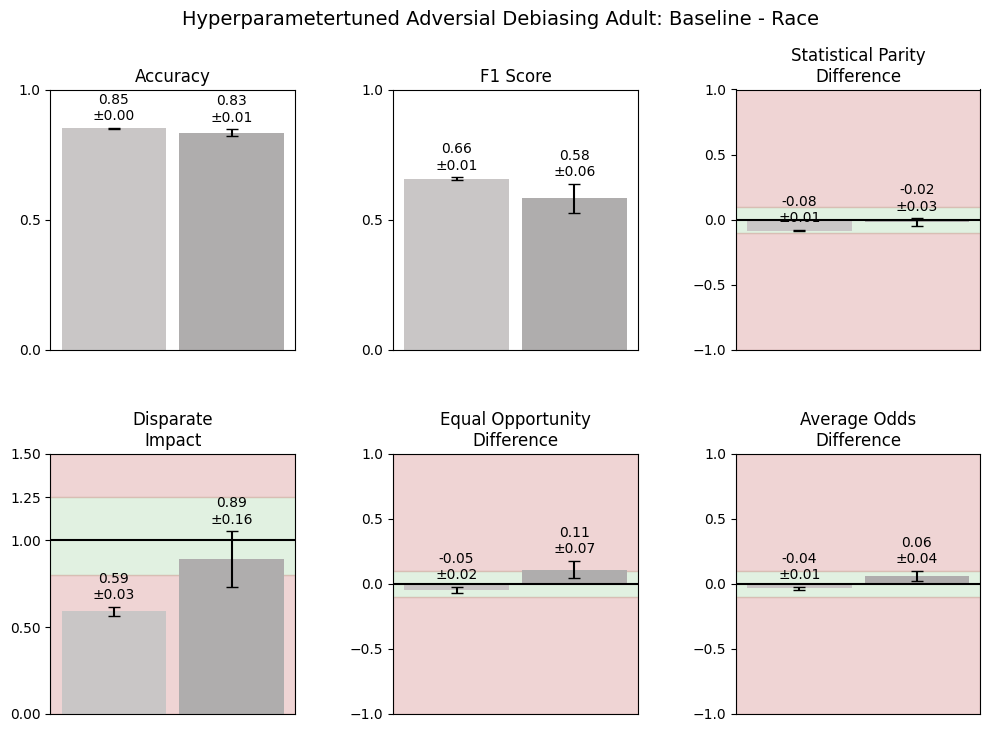

In [11]:
compare_viz_metrics_2x3(baseline_race_agg, adult_race_metrics_agg, 'Baseline', 'Race', 'Hyperparametertuned Adversial Debiasing Adult: Baseline - Race')

## hyperparameter search adversial debiaser, sex

In [12]:
import pandas as pd
from sklearn.model_selection import ParameterGrid, StratifiedShuffleSplit, StratifiedKFold
from src.metrics import best_hyperparameter_advdeb

# 1) Retrieve data
protected           = 'sex'
privileged_value    = 1.0
unprivileged_value  = 0.0
privileged_groups   = [{protected: privileged_value}]
unprivileged_groups = [{protected: unprivileged_value}]

tf.disable_v2_behavior()
ds, df = load_adult_sex()  
feature_cols = [c for c in df.columns if c not in ('label','sex')]

# 2) Hyperparameter Search
param_grid = {
    'adversary_loss_weight': [0.5, 1.0],
    'num_epochs':            [10, 20, 50],
    'batch_size':            [64, 128]
}
grid = list(ParameterGrid(param_grid))

grid_results = []
# Perform hyperparameter search with 15 stratified shuffle splits
for params in grid:
    print(f"Testing config: {params}")
    fold_metrics = []
    sss = StratifiedShuffleSplit(n_splits=15, test_size=0.3, random_state=42)

    for train_idx, test_idx in sss.split(df, df['label']):
        test_df, y_test, y_pred = adversial_debiasing_train_and_predict(
            df, train_idx, test_idx,
            protected, privileged_value, unprivileged_value,
            privileged_groups, unprivileged_groups,
            scope_name='adv',
            num_epochs=params['num_epochs'],
            batch_size=params['batch_size'],
            adversary_loss_weight=params['adversary_loss_weight']
        )
        m = compute_metrics(
            test_df, y_test, y_pred,
            protected, privileged_value, unprivileged_value
        )
        fold_metrics.append(m)
    
    df_fm = pd.DataFrame(fold_metrics)
    agg = df_fm.agg(['mean', 'std'])

    grid_results.append({
        **params,
        'acc_mean':   agg.loc['mean', 'accuracy'],
        'acc_std':    agg.loc['std',  'accuracy'],
        'f1_mean':    agg.loc['mean', 'f1_score'],
        'f1_std':     agg.loc['std',  'f1_score'],
        'SPD_mean':   agg.loc['mean', 'SPD'],
        'SPD_std':    agg.loc['std',  'SPD'],
        'DI_mean':    agg.loc['mean', 'DI'],
        'DI_std':     agg.loc['std',  'DI'],
        'EOD_mean':   agg.loc['mean', 'EOD'],
        'EOD_std':    agg.loc['std',  'EOD'],
        'AOD_mean':   agg.loc['mean', 'AOD'],
        'AOD_std':    agg.loc['std',  'AOD'],
    })

results_df = pd.DataFrame(grid_results)

# 3) Hyperparameter Selection
best_param = best_hyperparameter_advdeb(results_df)
print(f"Best parameters: {best_param}")

# Final evaluation with StratifiedKFold
loss_weight = best_param['adversary_loss_weight']
n_epochs    = int(best_param['num_epochs'])
batch_sz    = int(best_param['batch_size'])

# 4) Run experiment, Evaluate
results = []
folds = StratifiedKFold(n_splits=25, shuffle=True, random_state=42)

for train_idx, test_idx in folds.split(df, df['label']):
    test_df, y_test, y_pred = adversial_debiasing_train_and_predict(
        df, train_idx, test_idx,
        protected, privileged_value, unprivileged_value,
        privileged_groups, unprivileged_groups,
        scope_name='adv',
        num_epochs=n_epochs,
        batch_size=batch_sz,
        adversary_loss_weight=loss_weight
    )
    m = compute_metrics(
        test_df, y_test, y_pred,
        protected, privileged_value, unprivileged_value
    )
    results.append(m)

# 5) Aggregate results
adult_sex_metrics       = pd.DataFrame(results)
adult_sex_metrics_agg   = adult_sex_metrics.agg(['mean','std'])
print(adult_sex_metrics_agg)

Testing config: {'adversary_loss_weight': 0.5, 'batch_size': 64, 'num_epochs': 10}
epoch 0; iter: 0; batch classifier loss: 11.180571; batch adversarial loss: 0.686823
epoch 0; iter: 200; batch classifier loss: 15.442457; batch adversarial loss: 0.646029
epoch 0; iter: 400; batch classifier loss: 12.664048; batch adversarial loss: 0.622492
epoch 1; iter: 0; batch classifier loss: 56.798271; batch adversarial loss: 0.639511
epoch 1; iter: 200; batch classifier loss: 1.051027; batch adversarial loss: 0.592792
epoch 1; iter: 400; batch classifier loss: 1.987360; batch adversarial loss: 0.644359
epoch 2; iter: 0; batch classifier loss: 0.998826; batch adversarial loss: 0.629803
epoch 2; iter: 200; batch classifier loss: 3.019346; batch adversarial loss: 0.605085
epoch 2; iter: 400; batch classifier loss: 0.416755; batch adversarial loss: 0.641453
epoch 3; iter: 0; batch classifier loss: 0.464090; batch adversarial loss: 0.617592
epoch 3; iter: 200; batch classifier loss: 2.023048; batch ad

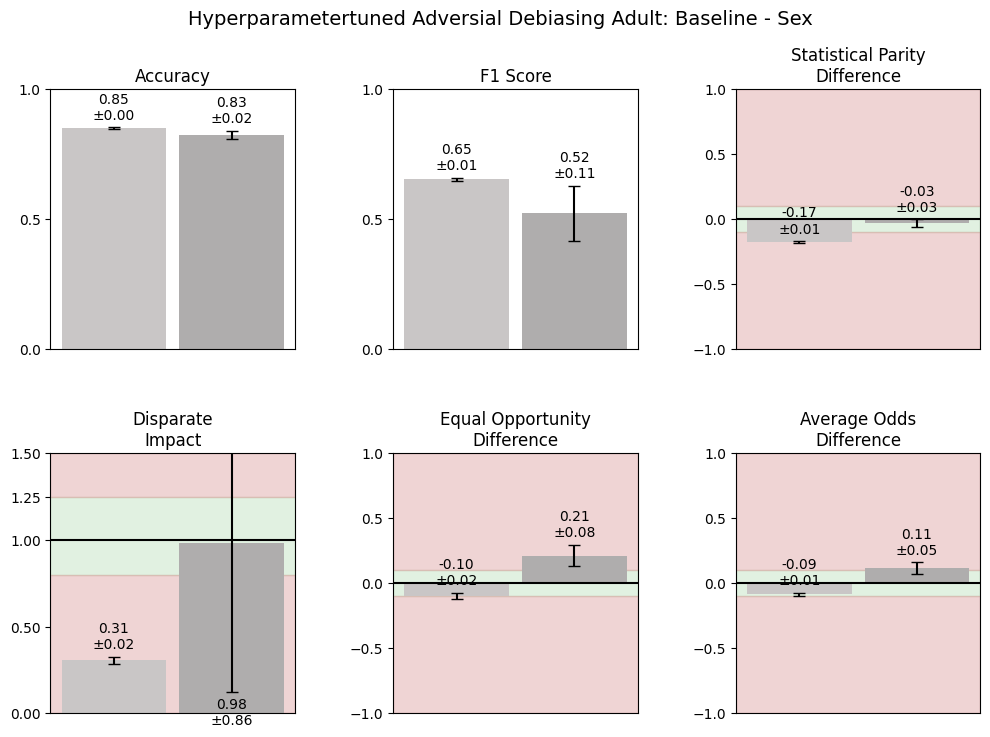

In [13]:
compare_viz_metrics_2x3(baseline_sex_agg, adult_sex_metrics_agg, 'Baseline', 'Sex', 'Hyperparametertuned Adversial Debiasing Adult: Baseline - Sex')